# Musical Modes, Manhattan Metric, and MDS Manifolds

Here I explore some musical **modes**: ionian, dorian, phrygian, etc.
I also think about things like the "distance between two modes" and how this relates to geometry.

The main goal is to have some fun with music and math!

TODO:
- Create a way of listening to the results. For example, when looking at the distance matrix, clicking on an element could play each of the two modes back and forth to compare / contrast them.
- It would be exciting to see how these ideas might manifest in the form of a song.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display
import seaborn as sns
import copy

## Notes

The piano has a bunch of black and white keys that you can press.
When you press the one near the middle called "middle C", it makes a certain sound.
When you press a different key, it makes a different sound.
Each of these different sounds corresponds to a different **musical note**.
The more specific name for "middle C" is $C_4$ - the fourth C counting from the left on the piano.

## Intervals

Intervals are distances between notes.

The smallest distance (for our purposes) is an interval called a half-step.
For example, C and C&sharp; are one half-step apart.
Similarly, C&sharp; and D are one half-step apart.

Two half-steps make a whole-step.
So it is a whole step from C to D.
It is also a whole step from D to E.

We'll be focusing on half-steps and whole steps, but there are other names too.
For example, 3 half steps is called a minor third, 4 half-steps is called a major third, 5 half-steps is called a fourth, and 7 is called a fifth.

>An interval has to do with note distances or relationships.

## Introduction to musical modes

<img src="keyboard.jpg" width="400px"/>

The easiest way to start learning about modes is to think about the white notes on the piano.

If you start at C and go up, D, E, F, G, A, B, C, you will have played what is commonly called a C major scale.
This is also known as the ionian mode (starting on C).
Listen to this mode in the song 
<a href="https://www.youtube.com/watch?v=Qy9cj-zwbVY" target="_blank">"Doe a deer, a female deer..."</a>
.

If you play those very same (white) notes, but start on D instead (.. E, F, G, A, B, C, D) it will sound different.
It sounds different not only because it's higher in pitch, but the quality is different.
This is the dorian mode.
Dorian is one of the minor modes.
You can hear this mode in the song 
<a href="https://www.youtube.com/watch?v=-Jj4s9I-53g" target="_blank">"Scarborough Fair"</a>
.

The easiest way to hear the other modes is by starting on another white note and going up (staying on white notes).
Starting on E gives phrygian, on F gives lydian, on G gives mixolydian, on A gives aeolian, and on B gives locrian.

## Defining modes in terms of pitch relationships.

We chose to start our ionian mode example on C while we started our dorian mode example on D.
This allowed us to keep things simple by sticking with just the piano's white notes.

We could choose to play the ionian mode starting on D instead of C.
How can we do that?

>The starting note does not define the mode. A mode is a sequence of relationships between notes - a sequence of intervals.

We can understand the ionian mode as a sequence of steps.
You start on some pitch, let's say C.
Then you go up a whole-step to D, then another whole-step to E.
Then a half-step to F, then three whole-steps to G, A, and B, then finally a half-step to C.

Let's ignore the notes and focus on the steps.
Then the sequence or pattern that defines the ionian mode is: W, W, H, W, W, W, H.

Starting this pattern on D, we go up a whole-step to E, up another whole-step to F&sharp;, up a half-step to G, up a whole-step to A, another whole-step to B, another whole-step to C&sharp;, and finally a half-step to D.

We can do this starting on any note - so we can play the ionian mode starting anywhere on the piano!

## Modes and permutations

The pattern that defines the dorian mode is: W, H, W, W, W, H, W.

Notice how the dorian pattern can be obtained from the ionian pattern by taking the W off the beginning and tacking it on the end. 
This is known as a cyclic permutation.

With a little thought you can see that the other modes can be obtained by cyclically permuting the steps that define the ionian mode.

Let's collect some information about our modes, names, sequences etc. in a pandas DataFrame.

In [11]:
mode_names = ['ionian', 'dorian', 'phrygian', 'lydian', 'mixolydian', 'aeolian', 'locrian']

mode_df = pd.DataFrame(mode_names, columns=['name'])

ionian_pattern = 'WWHWWWH'

def cycle_pattern(pattern, shift):
    return pattern[shift:] + pattern[:shift]
    
mode_df['pattern'] = ionian_pattern

mode_df['pattern'] = mode_df.apply(lambda row: cycle_pattern(row.pattern, row.name), axis=1)

mode_df

,name,pattern
0,ionian,WWHWWWH
1,dorian,WHWWWHW
2,phrygian,HWWWHWW
3,lydian,WWWHWWH
4,mixolydian,WWHWWHW
5,aeolian,WHWWHWW
6,locrian,HWWHWWW


## What is the distance between two modes?

Some modes are fairly similar.
For example, C ionian is very similar to C lydian.

- The notes of C ionian are : C, D, E, F, G, A, B, C.
- The notes of C lydian are : C, D, E, F&sharp;, G, A, B, C.

Only one note is different.
For now, I'd like to consider this difference as being *one unit*.

{{ mode_df[mode_df['name'].isin(['ionian', 'lydian'])] }}

However, our pattern is different in the third **and** fourth symbols, so arguably the real similarity is not as clear as it could be.

It will be more useful to consider the "cumulative pattern".

In [24]:
def pattern_to_int_pattern(pattern):
    d = {'H':1, 'W':2}
    # First map to integers
    return  list(map(lambda char: d[char], pattern))

def int_pattern_to_cumulative(int_pattern):
    # This version prepends a zero.
    # return np.append([0], np.cumsum(int_pattern))
    # This version has no initial zero.
    return np.cumsum(int_pattern)
    
mode_df['int pattern'] = mode_df['pattern'].apply(pattern_to_int_pattern)
mode_df['cumul pattern'] = mode_df['int pattern'].apply(int_pattern_to_cumulative)

Let's look at the cumulative patterns of ionian and lydian.

In [27]:
mode_df.loc[mode_df['name'].isin(['ionian', 'lydian']), ['name','cumul pattern']]
# mode_df['cumul pattern'][mode_df['name'].isin(['ionian', 'dorian'])]
# mode_df.query("name==['ionian', 'dorian']")[['name', 'cumul pattern']]

,name,cumul pattern
0,ionian,"[2, 4, 5, 7, 9, 11, 12]"
3,lydian,"[2, 4, 6, 7, 9, 11, 12]"


## Manhattan Metric

The cumulative patterns for ionian and lydian differ in one place.
This is the same as saying that C ionian and C lydian are the same except for one note.

Let's say then that these two modes are *one unit apart*.

If two other modes differ in two places, let's say they are two units apart.
Importantly, let's not worry about *which* notes are the same or different - we'll just count up the differences.

We can think of this distance as a Manhattan metric.
Here we take a brief digression:

----------

Imagine a neighborhood with the houses of three friends, Alice, Bob and Charlie.
The streets running east-west are named 1st St., 2nd St., and 3rd St.
The streets running north-south are named A St., B St., and C St.
Alice lives at 1st and A, Bob lives at 2nd and A, and Charlie lives at 2nd and B.

Clearly Alice and Bob are 1 block apart.
Also, Bob and Charlie are also 1 block apart.

But what about Alice and Charlie?
There are (at least) two ways to answer this.
To get from Alice's to Charlie's house along the streets, you'd have to walk one block east and one block north.
That's two blocks.
If you could walk straight there through the neighbors' backyards, it would be less than 2 full blocks.
In fact, by the Pythagorean theorem, it would be $\sqrt{2}$ blocks, or roughly 1.4 blocks.

We can represent the first answer as:
$$ (1^1 + 1^1)^1/1 = 2$$
and the second answer as:
$$ (1^2 + 1^2)^1/2 = \sqrt{2}$$

The second answer looks like the Pythagorean theorem.
This notion of distance is the Euclidean distance.

The first type of distance is, in some ways, less familiar.
This kind of distance is called the "Manhattan" metric or sometimes the "city block" metric.

We consider the difference in the north-south coordinate, and the difference in the east-west coordinate, and then add these two numbers.

Now, instead of two street directions, north-south and east-west, what if there were more? (like 8..)
In our musical mode context, we can think of each symbol in the cumulative pattern as a location.

Consider the ionian and dorian modes.

{{ mode_df.loc[mode_df['name'].isin(['ionian', 'lydian']), ['name','cumul pattern']] }}

In the first coordinate they both read "W".
That's like saying they are on the same street in the north-south direction.

In the second coordinate, they differ - "W" vs "H".
That's like saying in the east-west direction they are one block apart.

Considering all directions together, we find that the distance between ionian and dorian is 2 (in the Manhattan metric) and $\sqrt{2}$ (in the Euclidean metric).

----------

Let's continue on making use of the Manhattan metric for now.
Maybe we can play with other metrics in the future.

In [28]:
from scipy.spatial.distance import squareform, pdist

In [29]:
# One might call the distance metric on a set of dataframe columns.
# Here our vector data is all within one column.
# Unpacking a np.array of np.arrays can be done with np.stack - a handy trick.
cpats = np.stack(mode_df['cumul pattern'].values)

## Here are all of the pairwise distances between modes.

In [31]:
pairwise_df = pd.DataFrame(squareform(pdist(cpats, metric='cityblock')), columns=mode_df['name'], 
                           index=mode_df['name'])
pairwise_df

name,ionian,dorian,phrygian,lydian,mixolydian,aeolian,locrian
name,,,,,,,
ionian,0.0,2.0,4.0,1.0,1.0,3.0,5.0
dorian,2.0,0.0,2.0,3.0,1.0,1.0,3.0
phrygian,4.0,2.0,0.0,5.0,3.0,1.0,1.0
lydian,1.0,3.0,5.0,0.0,2.0,4.0,6.0
mixolydian,1.0,1.0,3.0,2.0,0.0,2.0,4.0
aeolian,3.0,1.0,1.0,4.0,2.0,0.0,2.0
locrian,5.0,3.0,1.0,6.0,4.0,2.0,0.0


## Let's visualize these distances

(0.0, 7.0, 7.0, 0.0)

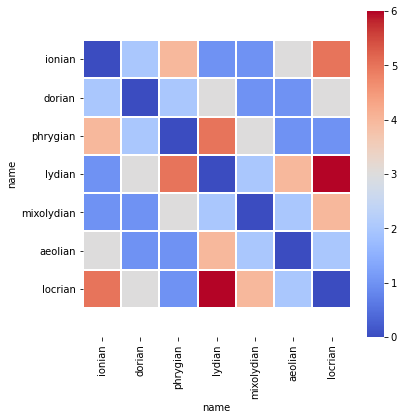

In [32]:
plt.figure(figsize=(6, 6))
sns.heatmap(pairwise_df, cmap='coolwarm', linewidth=1);
plt.axis('equal')
# TODO: Use bqplot to do something interactive - maybe listen to the modes while hovering.

Notice a few things about this figure.

- All of the diagonal elements are blue.
This is because the distance from any mode to itself is zero (this makes good sense).

- Another thing to notice is that there seems to be a fair amount of blue.
That means modes tend to be closer to one another.

- We might also note some of the larger distances.
For example, the greatest distance is between locrian and lydian.
Ionian-locrian and phyrgian-lydian are also pretty far apart.

## We can also think about differences in more detail.

In the previous notion of distance, we ignored the specific source of the distance.
For example, a difference in the third note of the scale would be treated the same as a difference in the seventh.
Let's see what happens when we track these differences.
To do that, we'll focus on one particular mode as the "base mode" - ionian for now.
We'll compare each note of each mode to this base mode.

In [35]:
c = np.stack(mode_df['cumul pattern'].values)
# c

In [36]:
# Compare each scale degree with this "base mode".
comparison_mode_ind = 0 # Choose ionian

comparison_mode = copy.copy(c[comparison_mode_ind])

for mode_ind in range(c.shape[0]):
    c[mode_ind, :] = (c[mode_ind, :] == comparison_mode)
    
# c

## Visualize these comparisons.

Text(0.5, 1.0, 'base: ionian')

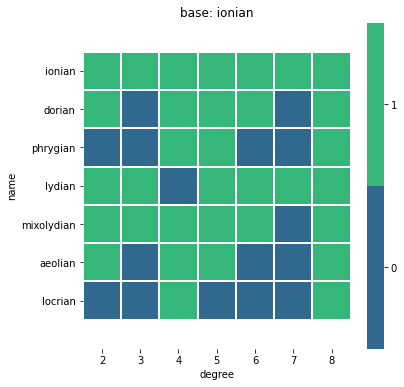

In [81]:
c = pd.DataFrame(c, columns=[2, 3, 4, 5, 6, 7, 8], 
                           index=mode_df['name'])

vals = np.unique(c.values)
max_val = max(vals)
min_val = min(vals)
n_vals = max_val - min_val + 1

plt.figure(figsize=(6, 6))
cmap = sns.color_palette("viridis", n_vals)
ax = sns.heatmap(c, linewidth=1, cmap=cmap)
colorbar = ax.collections[0].colorbar
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + 0.5 * r / n_vals + 0.5 * i for i in range(n_vals)])

colorbar.set_ticklabels(list(range(min_val, max_val + 1)))

plt.axis('equal')
plt.xlabel('degree')
plt.title('base: ionian')

## How do we interpret this?

In order to be comparable, we start each mode on the same note (e.g., C).
The first degree is the same by definition, and so we don't include it.
We do choose to include the eighth degree even though they are all the same here.
We could imagine some other set of tones where the eighth tone does not agree.
For example, a diminished scale would attain the upper C, but it would be the 9th note, not the eighth.

Note that every scale degree of ionian agrees with (the base mode) ionian - no surprise.

Dorian differs at the third degree (minor vs major) as well as the seventh (dominant vs major).

Locrian is the furthest from ionian.

## Apply this method to all modes (as base modes).

We just compared all modes to the base mode ionian.
Now let's do the same thing using dorian as a base mode, then phrygian, then...

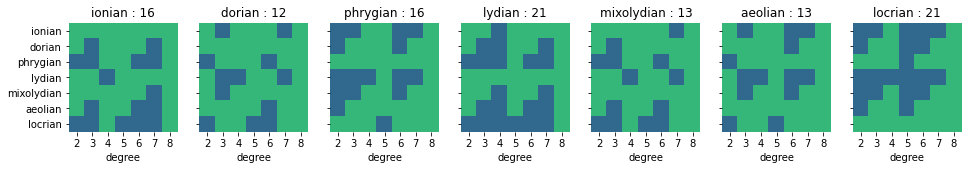

In [84]:
c = np.stack(mode_df['cumul pattern'].values)

def get_bool_grid(c, mode_df, ind):
    cbool = np.zeros_like(c, dtype=bool)
    comparison_mode = copy.copy(c[ind, :])

    for mode_ind in range(c.shape[0]):
        cbool[mode_ind, :] = (c[mode_ind, :] == comparison_mode)

    return pd.DataFrame(cbool, columns=[2, 3, 4, 5, 6, 7, 8], 
                               index=mode_df['name'])


fig, axn = plt.subplots(1, 7, sharex=True, sharey=True, figsize=(16, 3))
#cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axn.flat):
    
    if i < c.shape[0]:
        df = get_bool_grid(c, mode_df, i)
                
        cmap = sns.color_palette("viridis", 2)

        sns.heatmap(df, ax=ax,
                    cmap=cmap,
                    cbar=False,
                    #cbar=i == 0,
                    #cbar_ax=None if i else cbar_ax, 
                   square=True)
        ax.set_xlabel("degree")
        ax.set_ylabel("")
        ax.set_title("{} : {}".format(mode_df['name'][i], c.shape[0]**2 - df.to_numpy().sum()))
    else:
        fig.delaxes(ax)

## How do we interpret this?

At the top of each plot, we list the comparison mode.
Next to the comparison mode, we list the total number of differences (number of blue squares).

For example, the parent mode dorian has only 12 differences (blue squares).
This is the smallest of all the numbers.
The highest numbers are held by lydian and locrian.
This means that dorian is "in the middle" in some sense and lydian and locrian are "near the edge".

This gives us a hint about a reasonable **geometry of modes**.

Lydian and locrian are, all told, generally the farthest away.
Dorian (and also mixolydian and phrygian) are generally the closest.

A reasonable first guess it to try to arrange things in a line with lydian and locrian on the ends, dorian in the middle, and the others nearby.

## Can we make this geometry constructive?

First, a digression:

----------------
### How do you turn distances into geometry anyway??

Imagine you have two objects A and B and you know the distance between them (say 5 meters).
Then you can arrange A and B in a straight line 5 meters apart, and this is a faithful representation of the distances.
Two objects are embedded in a one-dimensional space.
We took knowledge of distances (here there was just one) and turned this into a geometric representation - the two points A and B separated by a straight line 5 meters long - no problem.

Next, imagine you have three objects A, B and C.
Let's say the distances are A to B is 5, B to C is 5 and A to C is 6.
There is no way to arrange A, B, and C in a straight line such that these three distances are respected.
We must make use of the plane and arrange them in a triangle.
These three objects are embedded in the two-dimensional plane.
Again we took knowledge of distances (3 numbers) and turned this into a geometric representation - a triangle.

However, imagine that the previous distances were instead 5, 6 and 11, then we *could* have arranged them in a straight line.
We would not have required use of the more general two-dimensional plane.
But this situation is a lucky one - it requires that the third distance is exactly equal to the sum of the other two.

Getting a triangle from 3 distances is not hard for us to imagine, so maybe the distances and geometry seem like almost the same thing - it may be hard to even think about three points without visualizing a triangle.
However if we continued this exploration, we would find that $N$ objects with "random" distances between pairs will require $N-1$ dimensions.
Thinking in any dimension greater than 3 is pretty difficult!
So here it really does make sense for us to first conceive of the distances (we go out with our ruler and measure pairwise distances 1000 times).
Then we come to the computer and ask, "How can we represent these distances in a meaningful way?"

If we have 100 points, will our object require 99 dimensions?
Or is there some structure that allows us to use only 2?

Also, what happens if, strictly speaking, these distances do not permit any dimension less than 99, however if we allow ourselves a little fudging, we can get them into 2 dimensions with only a small distortion.
That would probably be worth it, right?

Hopefully we are now understand this process a little and are motivated to make use of it.

----------------

Now let's return to our original distance matrix.
There are 7 objects.
In general this will require a 6-dimensional space.
This is hard to visualize and maybe not that useful.
It would be nice if we could get away with a lower dimension...

Let's find out!

## sklearn

`sklearn` or scikit-learn is the go-to machine learning package in Python.

We will make use of "multi-dimensional scaling" (MDS) to convert our pairwise-distances to a geometric arrangement.

We will then use PCA to rotate this arrangement so that it is in a convenient orientation.

In [85]:
from sklearn.manifold import MDS
from sklearn.decomposition import PCA

In [86]:
seed = np.random.RandomState(seed=234)

mds = MDS(n_components=2, max_iter=10**3, eps=1e-9, random_state=seed, dissimilarity="precomputed", verbose=0)
results = mds.fit(pairwise_df.values)
coords = results.embedding_

clf = PCA(n_components=2)
coords = clf.fit_transform(coords)

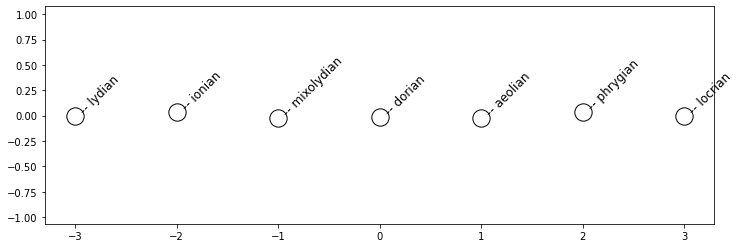

In [107]:
fig = plt.figure(figsize=(12, 4))
plt.scatter(coords[:, 0], coords[:, 1], marker = 'o', s=300, facecolor='white', edgecolor='k')
for ind in range(coords.shape[0]):
    plt.text(coords[ind, 0], coords[ind, 1], " -- " + pairwise_df.index[ind], rotation=45, size='large')
plt.axis('equal');

# We found a straight line!

Apparently the geometric arrangement of the musical modes is just a straight line!

(btw, I agree.. that was a heck of a lot of work for a straight line..)

Let's go back and look at the matrix to confirm that this straight line agrees with our constraints.

In [17]:
pairwise_df

name,ionian,dorian,phrygian,lydian,mixolydian,aeolian,locrian
name,,,,,,,
ionian,0.0,2.0,4.0,1.0,1.0,3.0,5.0
dorian,2.0,0.0,2.0,3.0,1.0,1.0,3.0
phrygian,4.0,2.0,0.0,5.0,3.0,1.0,1.0
lydian,1.0,3.0,5.0,0.0,2.0,4.0,6.0
mixolydian,1.0,1.0,3.0,2.0,0.0,2.0,4.0
aeolian,3.0,1.0,1.0,4.0,2.0,0.0,2.0
locrian,5.0,3.0,1.0,6.0,4.0,2.0,0.0


We see that all of the pairwise distance requirements are met.

For example, from the table, we see that the distance from dorian to lydian should be 3 units.
Looking at our linear arrangement, we see that in fact dorian and lydian are 3 units apart.

# Did we reinvent the wheel (or the circle of fifths..)?

<img src="Circle_of_fifths.png" width="400px"/>

https://en.wikipedia.org/wiki/Circle_of_fifths

If you are familiar with music theory, you might notice that these modes correspond to the circle of fifths.
Within the context of the white notes, lydian starts on F, ionian on C, mixolydian on G, ... and on up by fifths.

I propose that we did not just reinvent the wheel.
I propose that this coincidence between the geometry of the modes and the circle of fifths is somewhat of an accident.

I'd like to do some investigating and see if we can come up with an argument either way.

# Recap:

- We started with a parent mode, ionian, defined by a sequence of steps (WWHWWWH).
- We generated the other modes through cyclic permutation of these steps.
- We then computed the pairwise distances of these modes.
- Finally, using these distances, we constructed a geometric representation.
- We used multi-dimensional scaling, but you could have probably done that one by hand..

We found that the resulting geometry was a straight line - whoa!

And furthermore, the sequence within this straight line corresponds to the all-powerful cycle-of-fifths.

Was all of that destined to be? some Pythagorean tautology? an ur-law of string theory?

Or was it an accident? monkeys typing and pigeons cooing in pigeonholes?

In the next episode, I hope to play around with some "synthetic music theory" and see what we find!